In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from micrograd.engine import Value
from micrograd.graph import draw_dot
a = Value(3.0, label='a')
b = Value(2.0, label='b')
c = Value(4.0, label='c')

d = a + b; d.label='d'
e = d * c; e.label='e'
f = e.tanh(); f.label='f'

In [3]:
d.__dict__

{'data': 5.0,
 'grad': 0.0,
 '_op': '+',
 'label': 'd',
 '_prev': {Value(data=2.0, label='b'), Value(data=3.0, label='a')},
 '_backward': <function micrograd.engine.Value.__add__.<locals>._backward()>}

In [4]:
list(e._prev)[0]._prev
# list(list(c._prev)[1]._prev)[0].__dict__

{Value(data=2.0, label='b'), Value(data=3.0, label='a')}

In [5]:
list(f._prev)[0]._backward

<function micrograd.engine.Value.__mul__.<locals>._backward()>

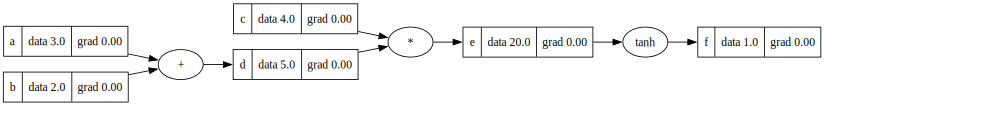

In [6]:
draw_dot(f)

In [47]:
# f.grad = 1.0 
e._backward()


f = e.tanh()



In [1]:
from micrograd.engine import Value
from micrograd.graph import draw_dot

In [16]:
a = Value(3.0, label='a')
b = Value(2.0, label='b')
c = Value(2.0, label='c')
x = Value(-9.449, label='d')
d = a + b; d.label='d'
e = d * c; e.label='e'
f = e + x; f.label='f'
g = f.tanh(); g.label='g'

In [20]:
g.backward()

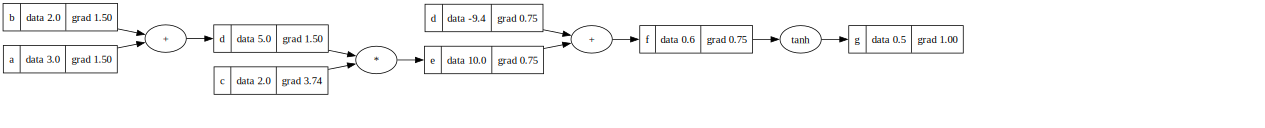

In [18]:
draw_dot(g, dpi="55")

In [277]:
a = Value(3.0, label='a')

d = a.__add__

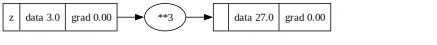

In [278]:
z = Value(3, label='z')
b = z**3
draw_dot(b, dpi="55")

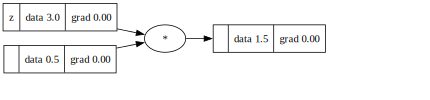

In [279]:
c = z / 2
draw_dot(c, dpi="55")

In [264]:
list(c.__dict__['_prev'])[0].__dict__

{'data': 0.5,
 '_op': '',
 'label': '',
 '_prev': set(),
 '_backward': <function micrograd.engine.Value.__init__.<locals>.<lambda>()>,
 'grad': 0}

In [19]:
x = Value(0.2,label='x')
y = x.tanh()
z = ((2 * x).exp() - 1) / ((2 * x).exp() + 1)
assert y.data == z.data

In [78]:
from micrograd.engine import Value
a = Value(5, label='a')
b = Value(4, label='b')
c = Value(6, label='c')
d = a + b; d.label='d'
# e = a * c; e.label='e'
# f = d + e; f.label='f'

# f.backward()

# need to fix the Value for cumulative grads

here 9


Value(data=9, label='d') 9
Value(data=5, label='a') 5
Value(data=4, label='b') 4


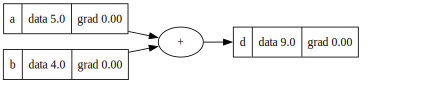

In [79]:
draw_dot(d)

In [35]:
a.__dict__

{'data': 5,
 '_op': '',
 'label': 'a',
 '_prev': set(),
 '_backward': <function micrograd.engine.Value.__init__.<locals>.<lambda>()>,
 'grad': Value(data=10.0, label='')}

In [37]:
a = Value(5, label='a')

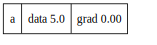

In [38]:
draw_dot(a)

In [80]:
from micrograd.engine import Value
a = Value(5, label='a')
b = Value(4, label='b')
d = a.__add__(b)
print(f"d: {d}, d.data: {d.data}")

d: Value(data=9, label=''), d.data: 9


In [82]:
# building a neuron
x1 = Value(2.0, label='x1')
w1 = Value(3, label='w1')
x2 = Value(3, label='w1')
w2 = Value(3, label='w1')
x1w1 = x1 * w1; label='x1w1'
x2w2 = x2 * w2; label='x2w1'

Value(data=6.0, label='')
Value(data=Value(data=6.0, label=''), label='')
Value(data=9, label='')
Value(data=Value(data=9, label=''), label='')


In [85]:
from micrograd.engine import Value

a = Value(5, label='a')
b = Value(4, label='b')

c = [a,b]

In [86]:
sum(c)

Value(data=9, label='')

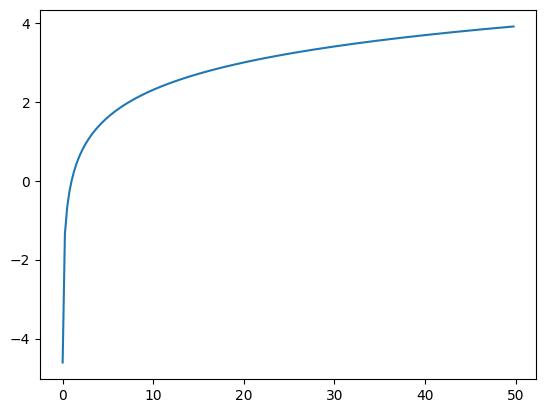

In [103]:
from math import log 
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0.01,50,0.25)
plt.plot(a, np.log(a))



In [22]:
from micrograd.engine import Value
from micrograd.graph import draw_dot
from micrograd.nn import Neuron, Layer, MLP

In [32]:
x = [2.0,3.0]
y = Neuron(2)
z = y(x)

y.parameters()
y.zero_grad()

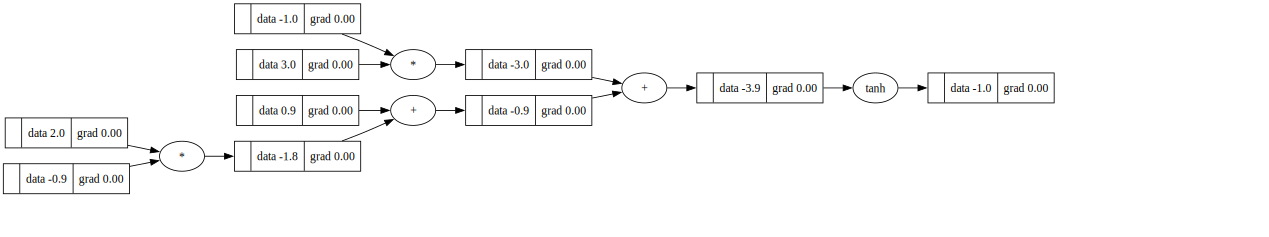

In [57]:
draw_dot(z)

In [60]:
x = [2.0, 3.0]
y = Layer(2, 20)
z = y(x)

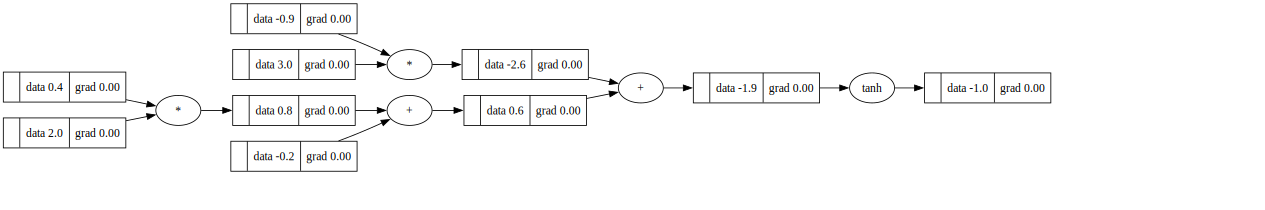

In [52]:
draw_dot(z[1])

In [73]:
x = [2.0, 3.0]
 = MLP(2, [4,4,1])
z = y(x)
z

2 4
4 4
4 1


Value(data=0.9494018632053244, label='')

In [62]:
## initialise the MLP 
n = MLP(3, [4, 4, 1])

len(n.parameters()) # 41 parameters

## set up training set
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs] # get current predictions

3 4
4 4
4 1


In [63]:
# train the model!
# len(n.parameters())

for k in range(2000):
    ypred = [n(x) for x in xs] # get current predictions
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]) # calculate the loss
    
    # backward pass
    n.zero_grad()
    loss.backward
    # for p in n.parameters():
        # p.grad = 0.0
    loss.backward()
    
    # update params
    for p in n.parameters():
        p.data += -0.05 if k < 6 else -0.005 * p.grad
    
    if k % 75 == 1: 
        print(k,loss.data)
        

1 4.452495226625183
76 0.7966288192915134
151 0.12625642540982468
226 0.05698981816353902
301 0.03510491138813128
376 0.02485868849251746
451 0.019035370013079672
526 0.015320778673203566
601 0.012762751883558975
676 0.010902564710859111
751 0.009493630854061602
826 0.008392254514648449
901 0.007509338004366461
976 0.006786849593558
1051 0.006185448357122091
1126 0.0056775643436585334
1201 0.005243328618981391
1276 0.004868075873112126
1351 0.0045407557122340595
1426 0.004252890114610154
1501 0.003997870528466263
1576 0.0037704725592725935
1651 0.003566513756707161
1726 0.003382607729183572
1801 0.0032159844653579166
1876 0.003064357020696655
1951 0.0029258212284638888


In [64]:
# current prediction based on xs training set
[n(x) for x in xs]

[Value(data=0.9784016450252012, label=''),
 Value(data=-0.9705192005225602, label=''),
 Value(data=-0.9830145603336203, label=''),
 Value(data=0.9651073623645777, label='')]

In [ ]:
draw_dot(loss) # big diagram which includes all 4 training example and the loss calc

In [45]:
# view a weights gradient:
n.layers[0].neurons[0].w[0].grad

0.0

In [2]:
import random, numpy as np, matplotlib.pyplot as plt
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

In [4]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

In [5]:
y = y*2 - 1

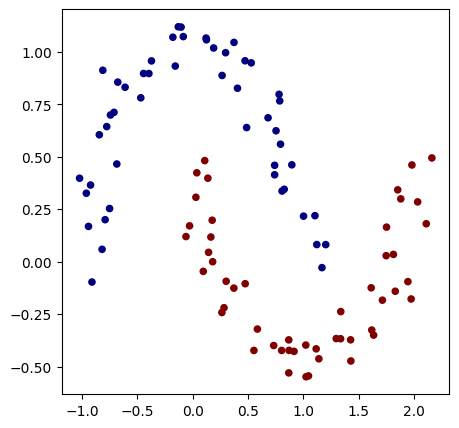

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=y, s=20, cmap='jet')

In [7]:
# initalise a model
model = MLP(2, [16,16,1])
print(model)
print("number of parameters", len(model.parameters()))

2 16
16 16
16 1
MLP of [Layer of [Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2), Tanh Neuron(2)], Layer of [Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16), Tanh Neuron(16)], Layer of [Tanh Neuron(16)]]
number of parameters 337


In [8]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.7840043023159258, label='') 0.68


In [9]:
# optimization
for k in range(120):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 5 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.7840043023159258, accuracy 68.0%
step 5 loss 0.2713707188453524, accuracy 90.0%
step 10 loss 0.21478840620418216, accuracy 91.0%
step 15 loss 0.16967500545392208, accuracy 94.0%
step 20 loss 0.14406510423987678, accuracy 96.0%
step 25 loss 0.15371654491268072, accuracy 95.0%
step 30 loss 0.08515925018963759, accuracy 99.0%
step 35 loss 0.06702251783787255, accuracy 100.0%
step 40 loss 0.0570550992806362, accuracy 100.0%
step 45 loss 0.05968476809115561, accuracy 99.0%
step 50 loss 0.06097359943517927, accuracy 98.0%
step 55 loss 0.047082093985736706, accuracy 100.0%
step 60 loss 0.04416518993839738, accuracy 99.0%
step 65 loss 0.03721995244176416, accuracy 100.0%
step 70 loss 0.03508226224515875, accuracy 100.0%
step 75 loss 0.03384110628659981, accuracy 100.0%
step 80 loss 0.0328666096944822, accuracy 100.0%
step 85 loss 0.03209931378659543, accuracy 100.0%
step 90 loss 0.031504226515778874, accuracy 100.0%
step 95 loss 0.03105650919587979, accuracy 100.0%
step 100 loss 

(-1.548639298268643, 2.10136070173136)

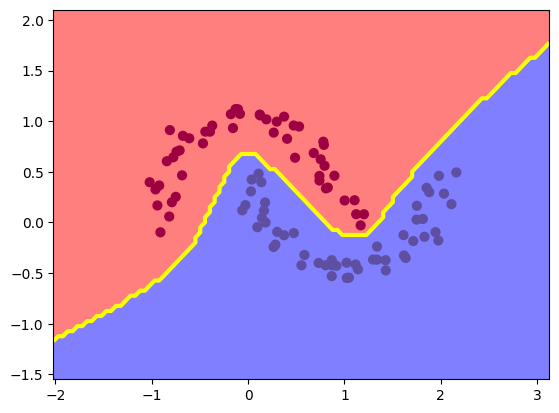

In [10]:
# visualize decision boundary
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])


h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='yellow', linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())